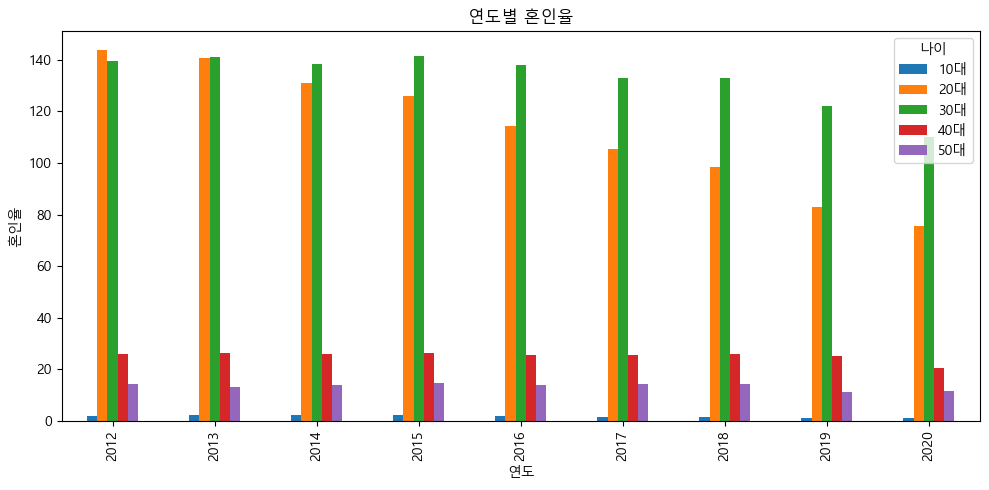

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/winbb/Desktop/aaq.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 연도와 나이를 기준으로 그룹화하여 혼인율 합계 계산
df_grouped = df.groupby(['연도', '나이'])['혼인율'].sum()

# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df_grouped.unstack().plot(kind='bar', ax=ax)
ax.set_title('연도별 혼인율')
ax.set_xlabel('연도')
ax.set_ylabel('혼인율')
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 평균 혼인율   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     86.00
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           3.51e-05
Time:                        15:29:37   Log-Likelihood:                -18.607
No. Observations:                   9   AIC:                             41.21
Df Residuals:                       7   BIC:                             41.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5292.1889    564.482      9.375      0.0

c:\Users\winbb\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


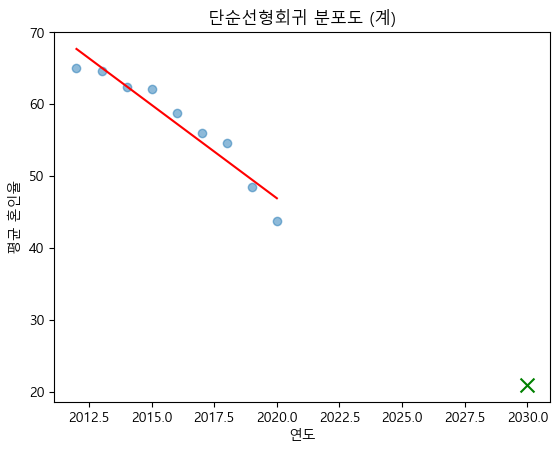

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = 'C:/Users/winbb/Desktop/aaq.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'



# 연도별 혼인율 평균 계산
mean_values = df_filtered.groupby('연도')['혼인율'].mean()

# 연도와 평균 혼인율로 데이터프레임 생성
df_mean = pd.DataFrame({'연도': mean_values.index, '평균 혼인율': mean_values.values})

# 단순선형회귀분석을 위한 데이터 선택
X = df_mean['연도']  # 독립 변수 선택
Y = df_mean['평균 혼인율']  # 종속 변수 선택

# 상수 항 추가
X = sm.add_constant(X)

# 단순선형회귀모델 학습
model = sm.OLS(Y, X)
results = model.fit()

# 회귀분석 결과 출력
print(results.summary())

# 예측하고자 하는 미래의 '연도' 값 설정
future_year = 2030

# 미래 '혼인율' 값 예측
X_future = np.array([1, future_year])
predicted_y = results.predict(X_future)

print(f"예측된 혼인율: {predicted_y[0]}")

# 회귀선과 산점도 그래프 그리기
plt.scatter(X['연도'], Y, alpha=0.5)  # 산점도
plt.plot(X['연도'], results.predict(), color='red')  # 회귀선
plt.scatter([future_year], predicted_y, color='green', marker='x', s=100)  # 미래 예측 지점
plt.xlabel('연도')
plt.ylabel('평균 혼인율')
plt.title('단순선형회귀 분포도 (계)')
plt.show()